pip install geopandas matplotlib contextily

In [1]:
# Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

In [7]:
# Load your data
path = r'C:\Users\Admin\Desktop\NextHikes\EDA_Project_Complete\Data\housing_data.csv'
# path = r'C:\Users\Admin\Desktop\NextHikes\EDA_Project_Complete\Data\enhanced_data.csv'
df = pd.read_csv(path)

In [9]:
# For demonstration, create a mock-up GeoDataFrame representing neighborhoods
# Normally, you would load this from a geographic data file (.shp, .geojson, etc.)
# Here's an example using simple made-up data:

data = {'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'],
        'Latitude': [34.0522, 51.5074, -33.8688, 35.6895, 55.7558, -23.5505, 48.8566, 40.7128, 28.6139, 19.4326, 52.5200, 37.7749,   
                 1.3521,    41.9028, -34.6037, 39.9042, 30.0444, 59.3293, -1.2921,  43.6532,   
                 22.3964,  33.5138, 3.1390, -22.9068, 60.1699],
        'Longitude': [-118.2437, -0.1278, 151.2093, 139.6917, 37.6173, -46.6333, 2.3522, -74.0060,  
                77.2090, -99.1332, 13.4050, -122.4194, 103.8198, 12.4964, -58.3816, 116.4074,  
                31.2357, 18.0686, 36.8219, -79.3832, 114.1095, 36.2765, 101.6869, -43.1729,  
                24.9384]}

In [10]:
geo_df = pd.DataFrame(data)
geo_df = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df.Longitude, geo_df.Latitude))


In [11]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [12]:
# Aggregate your main data by neighborhood to get mean prices or other stats
neighborhood_stats = df.groupby('Neighborhood')['SalePrice'].mean().reset_index()


In [13]:
# Merge this with the geographic data
geo_df = geo_df.merge(neighborhood_stats, on='Neighborhood', how='left')

In [14]:
# Convert to a GeoDataFrame
geo_df = gpd.GeoDataFrame(geo_df)

AttributeError: 'NoneType' object has no attribute 'to_string'

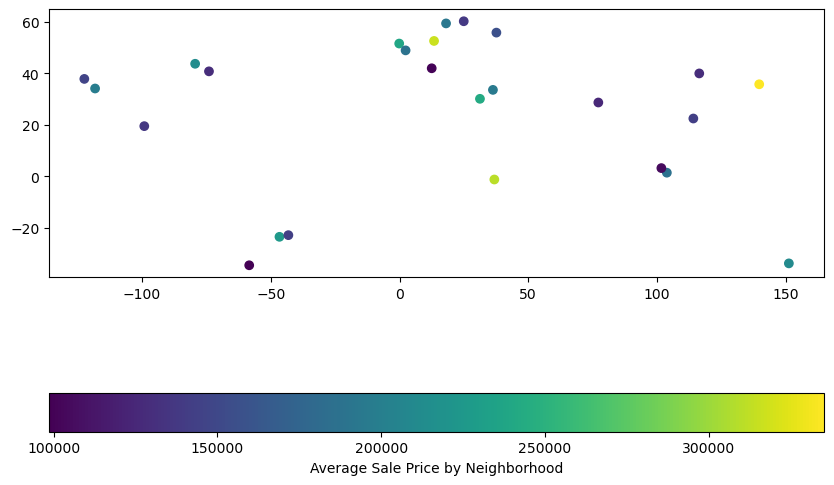

In [15]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
base = geo_df.plot(column='SalePrice', ax=ax, legend=True,
                   legend_kwds={'label': "Average Sale Price by Neighborhood",
                                'orientation': "horizontal"})
ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title('Geospatial Distribution of Average House Prices')
ax.set_axis_off()
plt.show()

Explanation:
Mock Geographic Data: This script starts by creating a mock GeoDataFrame that should represent real geographic data you might have. In practice, you'll replace this with loading a shapefile or other geographic data file that contains actual boundaries or points for neighborhoods or other locations relevant to your dataset.
Data Aggregation: The script calculates average sale prices per neighborhood. This step assumes that you can aggregate pricing data by some locational attribute.
Merging and Mapping: The geographic DataFrame is merged with the calculated statistics and then plotted as a choropleth map showing the average sale prices. contextily is used to add a basemap for better context.
Adjustments for Real Data: Replace the mock data and operations with your actual data operations. If you're using ZIP codes or similar, you might need to join your data with a ZIP code boundary file or use an API to convert ZIP codes to geographic coordinates.